# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

**IMPORTANTE** Podemos llegar a tener problemas con los Long Paths de Windows 10
Urls clave:
- https://learn.microsoft.com/en-us/windows/win32/fileio/maximum-file-path-limitation?tabs=registry#enable-long-paths-in-windows-10-version-1607-and-later
- https://support.microsoft.com/en-us/windows/how-to-open-registry-editor-in-windows-10-deab38e6-91d6-e0aa-4b7c-8878d9e07b11


In [ ]:
pip install tensorflow keras

Empezamos importando librerías

In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

 MNIST dataset is commonly used as a benchmark to test image classification models. Loading it with Keras provides an easy way to get started with image recognition tasks.

In [75]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context      

In [76]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [77]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


X_train is a 60000 x 28 x 28 array - this contains the 60,000 28x28 pixel training images

y_train is a 60000 element array - the corresponding digit labels for each training image

X_test is 10000 x 28 x 28 - the 10,000 test images

y_test is 10000 elements - the test labels



In [78]:
# Returns the first sample from the X_train data
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

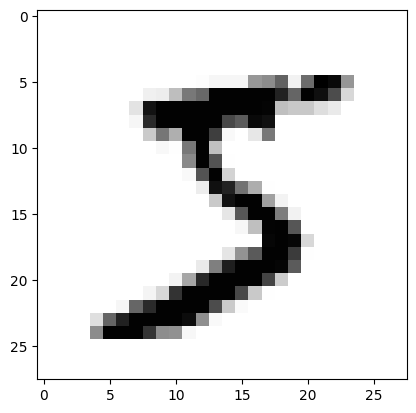

In [79]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap= plt.colormaps["Greys"]);# 

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [80]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

X_train and X_test are cast to float32 datatype

The pixel values are then divided by 255 to scale to 0-1 range

This rescaling is commonly done as a preprocessing step for image data before feeding into a neural network model.

The reasons are:

Neural networks typically expect float input data for the math to work properly.

Scaling to 0-1 range helps the data distribution have a similar range throughout the dataset. This can help improve model training.



In [81]:

np.mean(X_train)

0.13066062

Check that the preprocessing scaled the values reasonably. Since the images were scaled to 0-1 range, we'd expect the mean to be close to 0.5.

To check that the training data distribution looks sensible before feeding into the model. The mean gives a sense of the central tendency.

To use for data normalization/standardization. Some models benefit from input data with a zero mean. So you could subtract the mean from each input as additional preprocessing.

As a baseline for model accuracy. A simple model that predicts the mean pixel value would get around 10% accuracy on MNIST. So checking the mean gives a minimum baseline to beat.

To potentially detect any anomalies or issues with the loaded data by checking if the mean is unexpectedly

In [82]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [87]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

The labels in the MNIST dataset originally are integer values between 0-9 indicating the digit class.

Typically for neural network classification, it is common practice to encode labels as "one-hot" vectors. This represents each class as a vector with a 1 in the index for that class and 0s elsewhere.

Keras expects label inputs to be encoded as binary vectors when training classification models.

So converting the integer labels to float32 is likely in preparation for one-hot encoding the labels before model training. This is a necessary data preprocessing step.

The float32 type allows the vector elements to have fractional values (0s and 1s) compared to integers.

In summary, this casting to float32 is done to get the label data ready for one-hot encoding further preprocessing before feeding into the Keras neural network model.





Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [84]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

The last 10,000 images and labels from X_train and y_train are assigned to new X_val and y_val variables.

X_train and y_train are then reassigned to only contain the first 60,000-10,000=50,000 examples.

So the full 60,000 training examples have been split into:

X_train, y_train - 50,000 examples for training the model
X_val, y_val - 10,000 examples to validate the model during training
Using a validation set allows monitoring model performance on data not used in training. This helps detect and prevent overfitting.

The validation data is typically a subset taken from the original training data, as shown here.

In summary, this code is creating new validation sets by splitting off part of the original training data. This is a good practice for model training and evaluation.





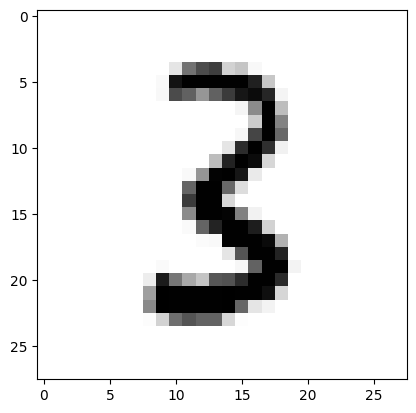

In [88]:
import matplotlib.pyplot as plt

#Deprecated! plt.imshow(X_val[0], cmap=plt.cm.get_cmap('Greys'));
plt.imshow(X_val[0], cmap= plt.colormaps["Greys"]);

In [89]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [16]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

**Keras Sequential model architecture**


**model** = keras.models.Sequential()
Creates a Sequential model, which stacks layers linearly.

**model.add(keras.layers.Flatten(input_shape=(28, 28)))**
The first layer is a Flatten layer which converts the 28x28 pixel input images into 784 length (28*28) vectors to feed into the dense layers.

**model.add(keras.layers.Dense(300, activation='relu'))**
This is a fully-connected dense layer with 300 units and ReLU activation.

**model.add(keras.layers.Dense(100, activation='relu'))**
Second dense layer with 100 units and ReLU activation.

**model.add(keras.layers.Dense(10, activation='softmax'))**
The final output layer has 10 units (one per digit class) with softmax activation to output classification probabilities.

*This builds a simple fully-connected neural network for classifying the handwritten digits, with two hidden layers for feature extraction before the output layer. The ReLU activation and softmax output are standard for classification models.*





In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**The ReLU (Rectified Linear Unit) activation function** is a commonly used activation function for hidden layers in neural networks.

Here's an explanation of what ReLU does:

It applies the function f(x) = max(0, x) to the input.

This means it thresholds all negative inputs to 0 while keeping positive inputs unchanged.

The output is a simple linear function for positive values, hence the name "rectified linear".

Some key properties and motivations for using ReLU:

It introduces non-linearity into the network, allowing neural nets to learn complex relationships.

Compared to other activations like sigmoid, ReLU tends to result in faster training and better generalization.

It avoids the vanishing gradient problem since the gradient is either 0 or constant positive for positive inputs.

It is computationally efficient as it involves simple thresholding.

In summary, the ReLU activation applies element-wise nonlinearity while keeping only the positive inputs. This has become the standard activation for hidden layers due to its faster training convergence and better generalization capabilities.

In [91]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [93]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [94]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [95]:
len(weights[0])

300

In [22]:
28*28 = 784 # neurons   

784

In [23]:
300*784 # 300 is the number of neurons in the hidden layer, 784 is the number of pixels in the image

235200

In [96]:
weights.size # weigh size means number of weights   

235200

In [99]:
biases[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

Establecemos la configuración de ejecución... el compile.

In [100]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

https://keras.io/api/losses/probabilistic_losses/#kldivergence-class

In [101]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [102]:
# Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               235500    
                                                                 
 dense_14 (Dense)            (None, 100)               30100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [103]:
X_train.shape

(50000, 28, 28)

In [104]:
50000/128 = 390.625  # 128 = batch_size 

390.625

In [31]:
# 
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 [==============================] - 7s 13ms/step - loss: 1.2331 - accuracy: 0.6930 - val_loss: 0.5914 - val_accuracy: 0.8653
Epoch 2/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5121 - accuracy: 0.8686 - val_loss: 0.3952 - val_accuracy: 0.8955
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 0.3955 - accuracy: 0.8933 - val_loss: 0.3325 - val_accuracy: 0.9096
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 0.3457 - accuracy: 0.9037 - val_loss: 0.3001 - val_accuracy: 0.9178
Epoch 5/50
391/391 [==============================] - 6s 14ms/step - loss: 0.3155 - accuracy: 0.9110 - val_loss: 0.2784 - val_accuracy: 0.9222
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 0.2936 - accuracy: 0.9170 - val_loss: 0.2637 - val_accuracy: 0.9251
Epoch 7/50
391/391 [==============================] - 5s 14ms/step - loss: 0.2762 - accuracy: 0.9222 - val_loss: 0.2497 - val_accuracy: 0.9282

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [32]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0818 - accuracy: 0.9779 - val_loss: 0.1057 - val_accuracy: 0.9698
Epoch 2/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0790 - accuracy: 0.9789 - val_loss: 0.1026 - val_accuracy: 0.9721
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0762 - accuracy: 0.9796 - val_loss: 0.1008 - val_accuracy: 0.9712
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0734 - accuracy: 0.9804 - val_loss: 0.0986 - val_accuracy: 0.9724
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0710 - accuracy: 0.9814 - val_loss: 0.0997 - val_accuracy: 0.9705
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0684 - accuracy: 0.9819 - val_loss: 0.0971 - val_accuracy: 0.9710
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 0.0662 - accuracy: 0.9823 - val_loss: 0.0959 - val_accuracy: 

The training loss is quite low at 0.0598, indicating the model is fitting the training data well.

**The training accuracy is high at 0.9842,** so the model is predicting the training labels accurately.

**The validation loss of 0.0967** is higher than the training loss. This gap indicates some overfitting is occurring.

The model is still performing quite well on the **validation set with 0.9728 accuracy**, but the drop from training accuracy shows overfitting.

Overall, the model seems to be fitting the training data very well, but needs some regularization or tuning to generalize better to the validation data and avoid overfitting.

Some things you could try are:

Adding dropout layers to regularize the model
Trying a smaller model with less capacity to overfit
Doing data augmentation to expand the training data
Reducing training epochs to avoid over-optimizing on the training data
So in summary, the model is overfitting which is expected, but some techniques could help improve validation performance while maintaining good training accuracy. The high training accuracy indicates low bias, so focusing on regularization for high variance would help.





Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [107]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 20, 'steps': 363}
[0, 1, 2, 3, 4, 5]


{'loss': [0.31771957874298096,
  0.31946542859077454,
  0.318808913230896,
  0.3449883759021759,
  0.32855361700057983,
  0.32208824157714844],
 'val_loss': [0.3402456045150757,
  0.7006036043167114,
  0.6078644394874573,
  0.7966445088386536,
  0.43870869278907776,
  0.3419862985610962]}

In [34]:
history.history

{'loss': [1.2330968379974365,
  0.512059211730957,
  0.3954629600048065,
  0.3456837236881256,
  0.3154762387275696,
  0.2936239540576935,
  0.2761595845222473,
  0.2615944445133209,
  0.24905195832252502,
  0.23805968463420868,
  0.22810259461402893,
  0.2190934419631958,
  0.2106892168521881,
  0.20303110778331757,
  0.19597695767879486,
  0.18938779830932617,
  0.18302011489868164,
  0.1774488091468811,
  0.17158636450767517,
  0.16640087962150574,
  0.16150201857089996,
  0.15699966251850128,
  0.15225447714328766,
  0.14814235270023346,
  0.14401131868362427,
  0.14034001529216766,
  0.13661479949951172,
  0.13305144011974335,
  0.12980926036834717,
  0.12659789621829987,
  0.12353730201721191,
  0.12059188634157181,
  0.11785876005887985,
  0.11503495275974274,
  0.112479567527771,
  0.10967199504375458,
  0.10735592991113663,
  0.1050608679652214,
  0.10274162888526917,
  0.10064034909009933,
  0.098486989736557,
  0.0965801253914833,
  0.09461388736963272,
  0.09267943352460861

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.233097,0.69302,0.591444,0.8653
1,0.512059,0.86862,0.395202,0.8955
2,0.395463,0.89334,0.332505,0.9096
3,0.345684,0.90374,0.300093,0.9178
4,0.315476,0.91104,0.278436,0.9222
5,0.293624,0.91698,0.263682,0.9251
6,0.276160,0.92224,0.249697,0.9282
7,0.261594,0.92590,0.237023,0.9343
8,0.249052,0.92920,0.229370,0.9356
9,0.238060,0.93256,0.218725,0.9386


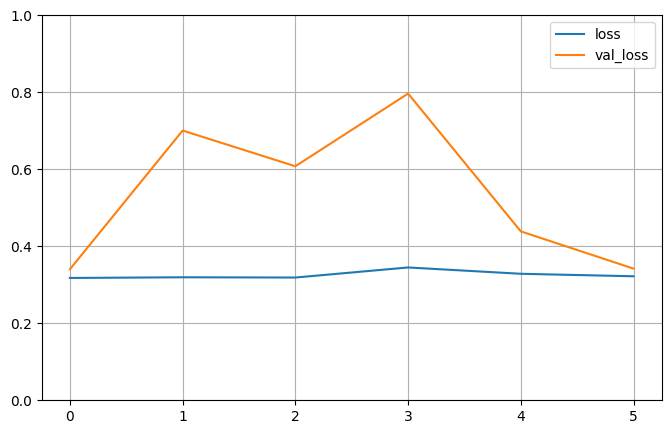

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [38]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 2s 7ms/step - loss: 0.0951 - accuracy: 0.9716


[0.09512048959732056, 0.9715999960899353]

In [40]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.colormaps.get_cmap 

SyntaxError: incomplete input (1473442946.py, line 2)

In [41]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [42]:
predictions = model.predict(X_test[:1]).round(3)
print(predictions.shape)
predictions

1/1 [==============================] - 0s 404ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ]], dtype=float32)

In [108]:
predictions.argmax()

7

In [109]:
model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


array([6, 6, 6, ..., 6, 9, 9])

In [112]:
from matplotlib import cm
plt.imshow(X_test[2].reshape(28,28), cmap=plt.colormaps.get_cmap('Greys'));

AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [113]:
# Cargamos datos
from matplotlib import cm
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [114]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Divimos en train, test y validation

In [115]:
"""Split the full housing dataset into training and test sets.

Splits the features (X) and targets (y) into training and test 
sets for model training and evaluation.
"""
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

"""Split the training set into training and validation sets.

Further splits the features (X_train) and targets (y_train) from 
the full training set into training and validation sets for 
training, validation and hyperparameter tuning.
"""
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [116]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [117]:
11610/32

362.8125

In [118]:
"""Creates a sequential Keras model with 2 dense layers.

The first layer has 30 units and a 'relu' activation, 
with an input shape matching the training data.

The second layer has 1 unit for regression."""
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

"""Compiles the model by specifying the loss function 
and optimizer.

Parameters:
- loss: Loss function to optimize during training. 
- optimizer: Optimization algorithm for updating weights.
"""
model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

"""Fits the Keras model on the training data.

Arguments:
- X_train: Training data input features.  
- y_train: Training data target values.
- epochs: Number of epochs to train for.
- validation_data: Validation data to evaluate loss and metrics.
"""
history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8953 - val_loss: 1.6512
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 2.0543 - val_loss: 0.4776
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4534 - val_loss: 0.4439
Epoch 4/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4191 - val_loss: 0.4647
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4029 - val_loss: 0.3931
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3907 - val_loss: 0.3905
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3870 - val_loss: 0.3800
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3817 - val_loss: 0.3728
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3795 - val_loss: 0.3723
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3746 - val_loss: 0.3731

In [53]:
8*30 + 30 

270

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                270       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
"""
Evaluates the MSE loss on the test data.
"""

mse_test = model.evaluate(X_test, y_test)
print("MSE:", mse_test)

 32/162 [====>.........................] - ETA: 0s - loss: 0.3119

162/162 [==============================] - 1s 8ms/step - loss: 0.3674
MSE: 0.3674147129058838


In [56]:

# Predict class labels for the first 5 samples in X_test
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 180ms/step


array([[2.4448686],
       [1.6384043],
       [2.7036328],
       [1.1734333],
       [4.5801682]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [121]:
model.save("my_keras_model") # save the model   

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [58]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model")

### Parameter: Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [59]:
checkpoint_cb = keras.callbacks.ModelCheckpoint
"""
Fits the model on the training data for a given number of epochs, 
saving the best checkpoint to a callback.
"""

history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
358/363 [============================>.] - ETA: 0s - loss: 0.3440INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 4s 8ms/step - loss: 0.3450
Epoch 2/30
360/363 [============================>.] - ETA: 0s - loss: 0.3441INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3439
Epoch 3/30
362/363 [============================>.] - ETA: 0s - loss: 0.3421INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3418
Epoch 4/30
359/363 [============================>.] - ETA: 0s - loss: 0.3481INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 7ms/step - loss: 0.3480
Epoch 5/30
357/363 [============================>.] - ETA: 0s - loss: 0.3400INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 4s 12ms/step - loss: 0.3419
Epoch 6/30
355/363 [============================>.] - ETA: 0s - loss: 0.4331INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 9ms/step - loss: 0.4340
Epoch 7/30
352/363 [============================>.] - ETA: 0s - loss: 0.3775INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 5ms/step - loss: 0.3776
Epoch 8/30
360/363 [============================>.] - ETA: 0s - loss: 0.3611INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3607
Epoch 9/30
353/363 [============================>.] - ETA: 0s - loss: 0.3523INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3524
Epoch 10/30
359/363 [============================>.] - ETA: 0s - loss: 0.3467INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3461
Epoch 11/30
357/363 [============================>.] - ETA: 0s - loss: 0.3428INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3422
Epoch 12/30
353/363 [============================>.] - ETA: 0s - loss: 0.3407INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 4s 11ms/step - loss: 0.3401
Epoch 13/30
354/363 [============================>.] - ETA: 0s - loss: 0.3545INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 4s 12ms/step - loss: 0.3527
Epoch 14/30
359/363 [============================>.] - ETA: 0s - loss: 0.3374INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 5s 13ms/step - loss: 0.3375
Epoch 15/30
360/363 [============================>.] - ETA: 0s - loss: 0.3342INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3339
Epoch 16/30
359/363 [============================>.] - ETA: 0s - loss: 0.3319INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 7ms/step - loss: 0.3319
Epoch 17/30
360/363 [============================>.] - ETA: 0s - loss: 0.3302INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 4s 10ms/step - loss: 0.3319
Epoch 18/30
349/363 [===========================>..] - ETA: 0s - loss: 0.3337INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 7ms/step - loss: 0.3327
Epoch 19/30
362/363 [============================>.] - ETA: 0s - loss: 0.3282INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 3s 8ms/step - loss: 0.3283
Epoch 20/30
350/363 [===========================>..] - ETA: 0s - loss: 0.3267INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 4ms/step - loss: 0.3257
Epoch 21/30
359/363 [============================>.] - ETA: 0s - loss: 0.3251INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.3245
Epoch 22/30
358/363 [============================>.] - ETA: 0s - loss: 0.3245INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.3248
Epoch 23/30
349/363 [===========================>..] - ETA: 0s - loss: 0.3429INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 5ms/step - loss: 0.3434
Epoch 24/30
347/363 [===========================>..] - ETA: 0s - loss: 0.3210INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 1s 4ms/step - loss: 0.3228
Epoch 25/30
362/363 [============================>.] - ETA: 0s - loss: 0.3206INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 5ms/step - loss: 0.3207
Epoch 26/30
361/363 [============================>.] - ETA: 0s - loss: 0.3378INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 6ms/step - loss: 0.3381
Epoch 27/30
357/363 [============================>.] - ETA: 0s - loss: 0.3238INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 5ms/step - loss: 0.3221
Epoch 28/30
347/363 [===========================>..] - ETA: 0s - loss: 0.3211INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 4ms/step - loss: 0.3213
Epoch 29/30
354/363 [============================>.] - ETA: 0s - loss: 0.3189INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 5ms/step - loss: 0.3190
Epoch 30/30
361/363 [============================>.] - ETA: 0s - loss: 0.3184INFO:tensorflow:Assets written to: callback_model/assets


INFO:tensorflow:Assets written to: callback_model/assets


363/363 [==============================] - 2s 7ms/step - loss: 0.3178


### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [60]:
"""
early_stopping_cb: Callback to stop training early if validation loss stops improving.

patience: Number of epochs with no improvement after which training will be stopped.

history: Training history returned by model.fit.

X_train, y_train: Training data and labels. 

epochs: Number of training epochs.

validation_data: Validation data tuple (X_valid, y_valid).

Fit the model on the training data for a given number of epochs, validating after each epoch. 
Stop early if validation loss doesn't improve for patience epochs.
"""


early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=20,
                    validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3177 - val_loss: 0.3402
Epoch 2/20
363/363 [==============================] - 2s 7ms/step - loss: 0.3195 - val_loss: 0.7006
Epoch 3/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3188 - val_loss: 0.6079
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3450 - val_loss: 0.7966
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3286 - val_loss: 0.4387
Epoch 6/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3221 - val_loss: 0.3420
